**Data Validation**

In [1]:
import pandas as pd
import numpy as np
import os
product_sales = pd.read_csv('product_sales.csv')
product_sales.head()
#Dataframe summary
product_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


- Null values in revenue column
- All data types are correct

**Getting rid of nulls in revenue column**

In [ ]:
product_sales_complete = product_sales[~product_sales['revenue'].isna()]
product_sales_missing = product_sales[product_sales['revenue'].isna()]
product_sales_missing.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,1074.000000,1074.000000,0.0,1074.000000,1074.000000
mean,3.357542,10.662942,NaN,4.797020,25.559590
std,1.709222,1.994864,NaN,5.006776,3.574097
min,1.000000,7.000000,NaN,0.000000,15.000000
25%,2.000000,9.000000,NaN,1.000000,23.000000
50%,3.000000,10.000000,NaN,3.000000,25.000000
75%,5.000000,12.000000,NaN,7.000000,28.000000
max,6.000000,16.000000,NaN,39.000000,41.000000


In [3]:
product_sales_complete.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,13926.000000,13926.000000,13926.000000,13926.000000,13926.000000
mean,3.078271,10.040069,93.934943,4.978960,24.947006
std,1.650650,1.789690,47.435312,5.047828,3.491491
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,1.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,4.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,37.000000


**Validating week column**

In [4]:
product_sales_complete['week'].value_counts()

1    3497
4    2387
5    2366
2    2323
3    2257
6    1096
Name: week, dtype: int64

**Validating sales_method column**

In [5]:
product_sales_complete['sales_method'].value_counts()

Email           6915
Call            4781
Email + Call    2203
em + call         20
email              7
Name: sales_method, dtype: int64

In [6]:
product_sales_complete['sales_method'] = product_sales_complete['sales_method'].replace({'email':'Email', 'em + call':'Email + Call'})
product_sales_complete['sales_method'].value_counts()

Email           6922
Call            4781
Email + Call    2223
Name: sales_method, dtype: int64

**Validating customer_id column**

In [7]:
len(product_sales_complete['customer_id'].unique())

13926

**Validating years_as_customer column**

In [8]:
product_sales_complete = product_sales_complete[product_sales_complete['years_as_customer'] <= 39]
product_sales_complete.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,13924.000000,13924.000000,13924.000000,13924.000000,13924.000000
mean,3.078282,10.040075,93.937828,4.971775,24.946926
std,1.650725,1.789819,47.437281,5.011542,3.491690
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,1.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,4.000000,11.000000,107.330000,7.000000,27.000000
max,6.000000,16.000000,238.320000,39.000000,37.000000


**Validating state column**

In [9]:
print(product_sales_complete['state'].unique())
print(product_sales_complete['state'].unique().shape)

['Kansas' 'Wisconsin' 'Illinois' 'Mississippi' 'Georgia' 'Oklahoma'
 'Massachusetts' 'Missouri' 'Texas' 'New York' 'Maryland' 'California'
 'Tennessee' 'North Dakota' 'Florida' 'Michigan' 'North Carolina'
 'Pennsylvania' 'Indiana' 'Hawaii' 'Colorado' 'Louisiana' 'Virginia'
 'Arkansas' 'Alaska' 'Oregon' 'New Hampshire' 'Ohio' 'New Jersey'
 'Connecticut' 'Iowa' 'Montana' 'Washington' 'Arizona' 'Kentucky'
 'Alabama' 'Nebraska' 'South Carolina' 'Minnesota' 'South Dakota' 'Maine'
 'Utah' 'West Virginia' 'Vermont' 'New Mexico' 'Rhode Island' 'Nevada'
 'Delaware' 'Idaho' 'Wyoming']
(50,)


**Exploratory Analysis**

Customers per approach

   week  sales_method  ... nb_site_visits        state
1     6  Email + Call  ...             28       Kansas
2     5          Call  ...             26    Wisconsin
4     3         Email  ...             28     Illinois
5     6          Call  ...             24  Mississippi
6     4         Email  ...             28      Georgia

[5 rows x 8 columns]
(13924, 8)
(13924,)


Email           6921
Call            4780
Email + Call    2223
Name: sales_method, dtype: int64

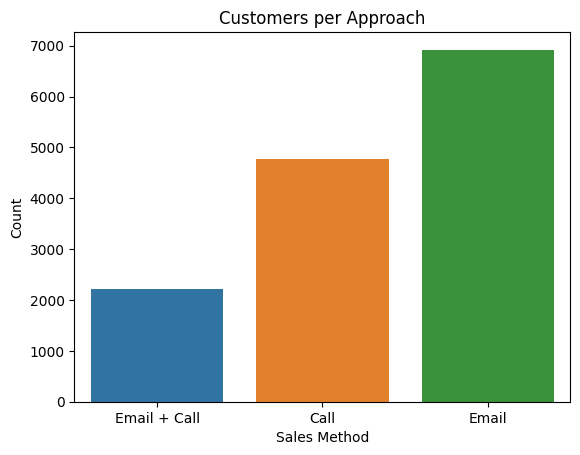

In [10]:
#checking if there are any duplicate customer ids
print(product_sales_complete.head())
print(product_sales_complete.shape)
print(product_sales_complete['customer_id'].unique().shape)
#graph of customers per approach
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='sales_method', data=product_sales_complete).set(title='Customers per Approach', xlabel='Sales Method', ylabel='Count')
product_sales_complete['sales_method'].value_counts()

**Spread of Revenue**

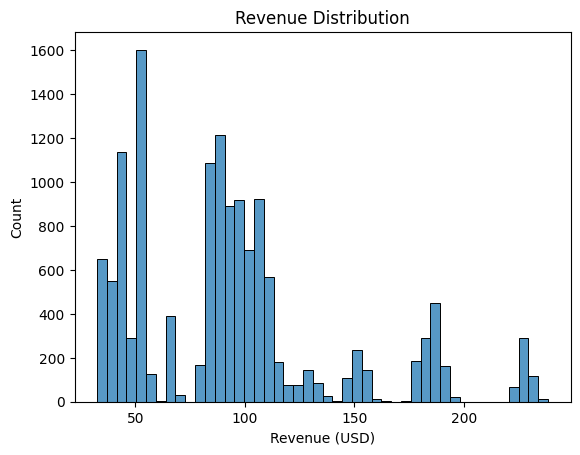

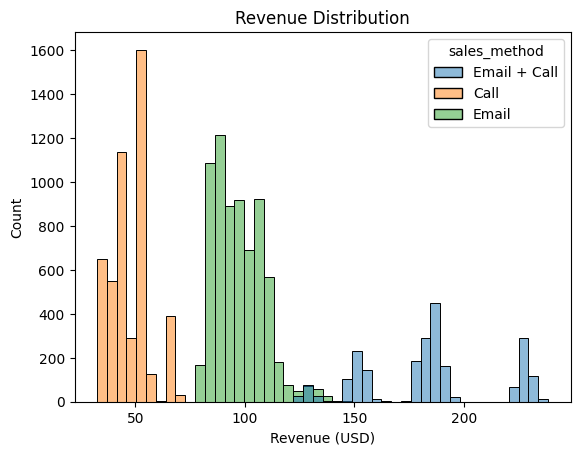

In [11]:
#overall revenue distribution
sns.histplot(x='revenue', data=product_sales_complete).set(title='Revenue Distribution', xlabel='Revenue (USD)')
plt.show()

#revenue distribution by sales method
sns.histplot(x='revenue', data=product_sales_complete, hue='sales_method').set(title='Revenue Distribution', xlabel='Revenue (USD)')
plt.show()


**Total revenue by sales method**

sales_method
Call            227513.02
Email           672220.61
Email + Call    408256.69
Name: revenue, dtype: float64


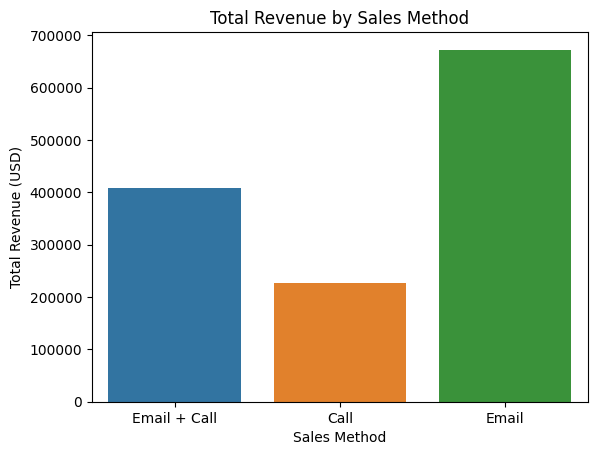

In [12]:
sns.barplot(x='sales_method', y='revenue', data=product_sales_complete, estimator=np.sum, errorbar=None).set(title='Total Revenue by Sales Method', xlabel='Sales Method', ylabel='Total Revenue (USD)')
total_revenue = product_sales_complete.groupby('sales_method')['revenue'].sum()
print(total_revenue)


**Revenue over time**

sales_method      Call      Email  Email + Call
week                                           
1             26159.18  229765.55      16885.33
2             33792.02  137794.35      26376.23
3             36247.27   98792.14      48737.14
4             49543.52  107788.37      78296.20
5             53518.11   74373.45     126809.72
6             28252.92   23706.75     111152.07
sales_method       Call      Email  Email + Call
week                                            
1              26159.18  229765.55      16885.33
2              59951.20  367559.90      43261.56
3              96198.47  466352.04      91998.70
4             145741.99  574140.41     170294.90
5             199260.10  648513.86     297104.62
6             227513.02  672220.61     408256.69
1307990.32


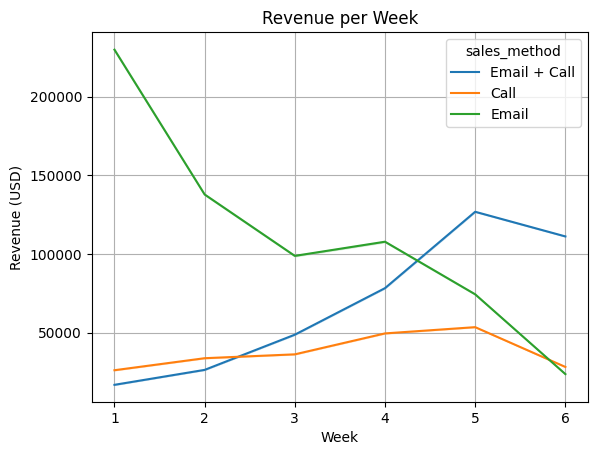

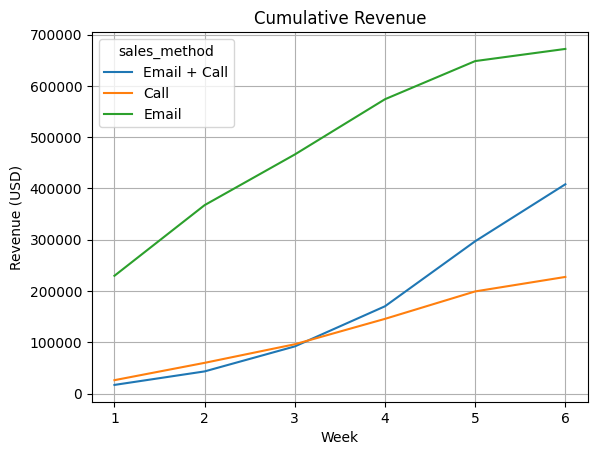

In [13]:
#revenue per week by sales method
revenue_sum = product_sales_complete.pivot_table(values='revenue', index='week', columns='sales_method', aggfunc=np.sum)
print(revenue_sum)

#cumulative revenue over time by sales method
revenue_cumsum = revenue_sum.cumsum()
print(revenue_cumsum)

#checking the total sum of revenue
total_revenue = product_sales_complete['revenue'].sum()
print(total_revenue)

#graph showing total weekly revene by sales method
plt.figure()
sns.lineplot(x='week', y='revenue', data=product_sales_complete, hue='sales_method', estimator='sum').set(xlabel='Week', ylabel='Revenue (USD)', title='Revenue per Week')
plt.grid()

#graph showing cumulative revenue by sales method over time
plt.figure()
sns.lineplot(x='week', y='Email + Call', data=revenue_cumsum, estimator=None)
sns.lineplot(x='week', y='Call', data=revenue_cumsum, estimator=None).set(xlabel='Week', ylabel='Revenue (USD)', title='Cumulative Revenue')
sns.lineplot(x='week', y='Email', data=revenue_cumsum, estimator=None)
plt.grid()
plt.legend(title='sales_method', labels=['Email + Call', 'Call', 'Email'])